<a href="https://colab.research.google.com/github/ryanskytree/Machine-Learning-Practice/blob/main/CCS592.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processing using bellman_ford and dijkstra algorithms

Randomly select nodes 3-20, calculate 20 times, take the average, and calculate the time and space of the two algorithms

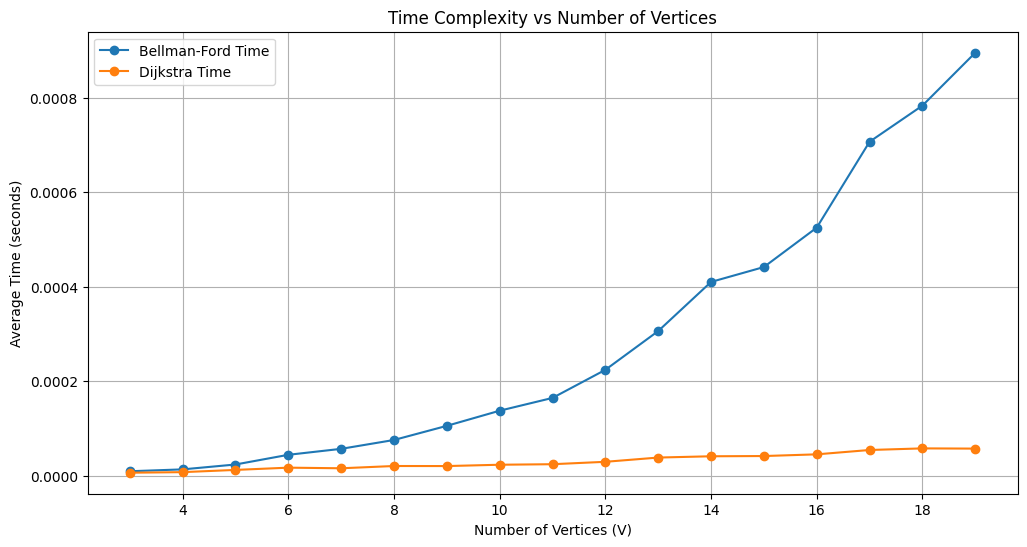

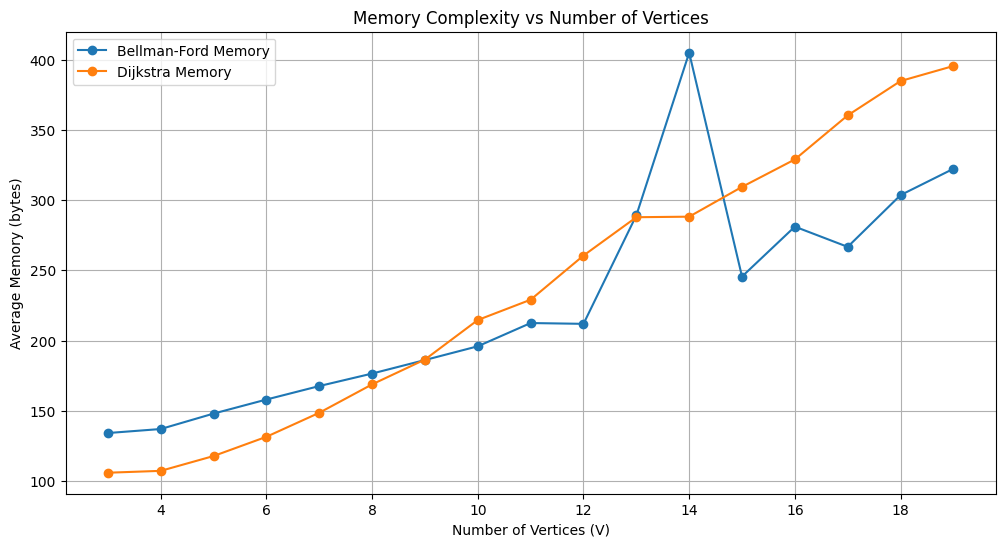

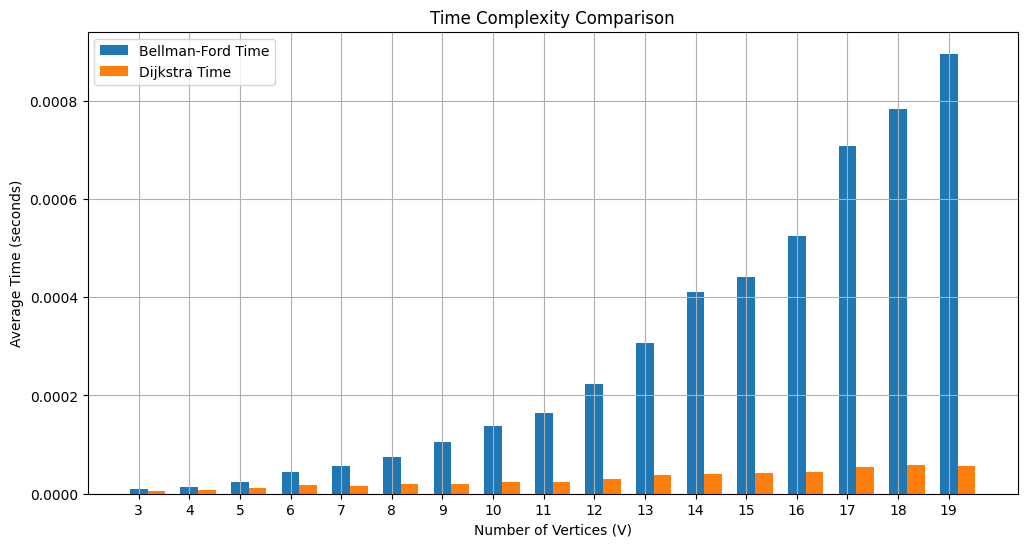

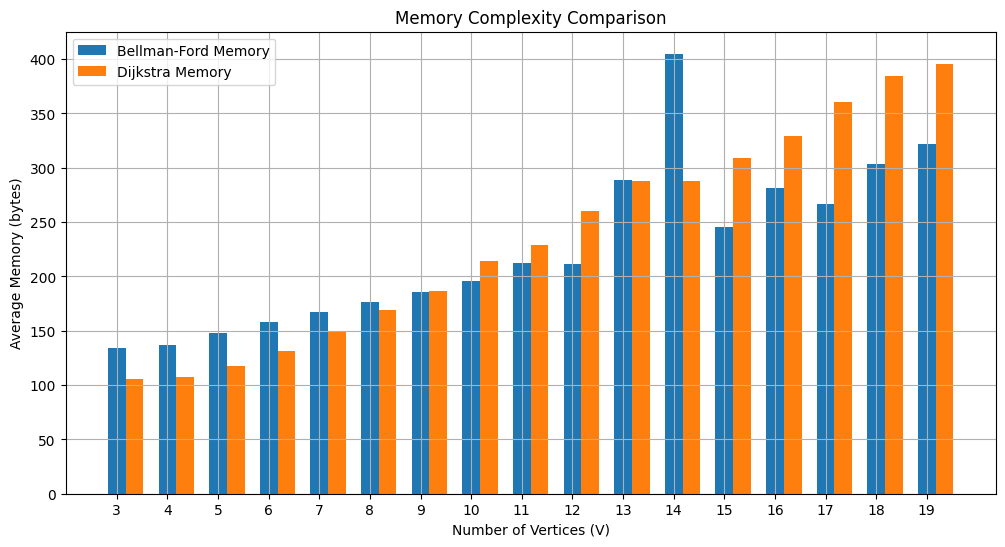

In [ ]:
import time
import random
import heapq
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import tracemalloc
from statistics import mean

class Graph:
    def __init__(self, V):
        self.V = V  # Number of vertices
        self.graph = {i: [] for i in range(V)}  # Adjacency list representation
        self.edges = []  # List of edges

    def add_edge(self, u, v, w):
        self.graph[u].append((v, w))  # Add edge to adjacency list
        self.edges.append((u, v, w))  # Add edge to edge list

    def generate_complex_graph(self):
        for u in range(self.V):
            for v in range(u + 1, self.V):
                if random.random() > 0.5:  # Randomly decide to add an edge or not
                    weight = random.randint(1, 9)
                    self.add_edge(u, v, weight)
                    self.add_edge(v, u, weight)

    def draw_graph(self):
        G = nx.DiGraph()
        for u, v, w in self.edges:
            G.add_edge(u, v, weight=w)

        pos = nx.spring_layout(G)
        edge_labels = {(u, v): w for u, v, w in self.edges}

        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

        plt.title("Graph Visualization")
        plt.savefig('graph.svg')
        plt.show()

class ShortestPathAlgorithms:
    def __init__(self, graph):
        self.graph = graph

    def bellman_ford(self, src):
        V = self.graph.V
        E = self.graph.edges
        dist = [float("Inf")] * V  # Initialize distances to infinity
        dist[src] = 0  # Distance to source is 0

        for _ in range(V - 1):
            for u, v, w in E:
                if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w  # Relax the edge

        for u, v, w in E:
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                print("Graph contains a negative weight cycle")
                return None  # Negative weight cycle detected

        return dist

    def dijkstra(self, src):
        V = self.graph.V
        dist = [float("Inf")] * V  # Initialize distances to infinity
        dist[src] = 0  # Distance to source is 0
        pq = [(0, src)]  # Priority queue for Dijkstra's algorithm

        while pq:
            d, u = heapq.heappop(pq)  # Get vertex with smallest distance
            if d > dist[u]:
                continue

            for v, weight in self.graph.graph[u]:
                if dist[u] + weight < dist[v]:
                    dist[v] = dist[u] + weight  # Relax the edge
                    heapq.heappush(pq, (dist[v], v))  # Push updated distance to priority queue

        return dist

def measure_execution_time_and_memory(V, iterations=20):
    bellman_ford_times = []
    bellman_ford_memories = []
    dijkstra_times = []
    dijkstra_memories = []

    for _ in range(iterations):
        graph = Graph(V)
        graph.generate_complex_graph()  # Generate a more interconnected graph
        algorithms = ShortestPathAlgorithms(graph)  # Initialize algorithms with the graph

        # Measure times and memory for Bellman-Ford
        for src in range(V):
            tracemalloc.start()
            start_time = time.time()
            algorithms.bellman_ford(src)  # Compute distances using Bellman-Ford
            end_time = time.time() - start_time  # Calculate execution time
            current, peak = tracemalloc.get_traced_memory()
            tracemalloc.stop()
            bellman_ford_times.append(end_time)
            bellman_ford_memories.append(peak)

        # Measure times and memory for Dijkstra
        for src in range(V):
            tracemalloc.start()
            start_time = time.time()
            algorithms.dijkstra(src)  # Compute distances using Dijkstra
            end_time = time.time() - start_time  # Calculate execution time
            current, peak = tracemalloc.get_traced_memory()
            tracemalloc.stop()
            dijkstra_times.append(end_time)
            dijkstra_memories.append(peak)

    avg_bellman_ford_time = mean(bellman_ford_times)
    avg_bellman_ford_memory = mean(bellman_ford_memories)
    avg_dijkstra_time = mean(dijkstra_times)
    avg_dijkstra_memory = mean(dijkstra_memories)

    return avg_bellman_ford_time, avg_bellman_ford_memory, avg_dijkstra_time, avg_dijkstra_memory

def plot_complexity_vs_vertices(V_range):
    bellman_ford_times = []
    bellman_ford_memories = []
    dijkstra_times = []
    dijkstra_memories = []

    for V in V_range:
        avg_bellman_ford_time, avg_bellman_ford_memory, avg_dijkstra_time, avg_dijkstra_memory = measure_execution_time_and_memory(V)
        bellman_ford_times.append(avg_bellman_ford_time)
        bellman_ford_memories.append(avg_bellman_ford_memory)
        dijkstra_times.append(avg_dijkstra_time)
        dijkstra_memories.append(avg_dijkstra_memory)

    # Plot average time complexity
    plt.figure(figsize=(12, 6))
    plt.plot(V_range, bellman_ford_times, label='Bellman-Ford Time', marker='o')
    plt.plot(V_range, dijkstra_times, label='Dijkstra Time', marker='o')
    plt.xlabel('Number of Vertices (V)')
    plt.ylabel('Average Time (seconds)')
    plt.title('Time Complexity vs Number of Vertices')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot average space complexity
    plt.figure(figsize=(12, 6))
    plt.plot(V_range, bellman_ford_memories, label='Bellman-Ford Memory', marker='o')
    plt.plot(V_range, dijkstra_memories, label='Dijkstra Memory', marker='o')
    plt.xlabel('Number of Vertices (V)')
    plt.ylabel('Average Memory (bytes)')
    plt.title('Memory Complexity vs Number of Vertices')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Bar chart for time complexity comparison
    plt.figure(figsize=(12, 6))
    bar_width = 0.35
    index = range(len(V_range))
    plt.bar(index, bellman_ford_times, bar_width, label='Bellman-Ford Time')
    plt.bar([i + bar_width for i in index], dijkstra_times, bar_width, label='Dijkstra Time')
    plt.xlabel('Number of Vertices (V)')
    plt.ylabel('Average Time (seconds)')
    plt.title('Time Complexity Comparison')
    plt.xticks(index, V_range)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Bar chart for memory complexity comparison
    plt.figure(figsize=(12, 6))
    plt.bar(index, bellman_ford_memories, bar_width, label='Bellman-Ford Memory')
    plt.bar([i + bar_width for i in index], dijkstra_memories, bar_width, label='Dijkstra Memory')
    plt.xlabel('Number of Vertices (V)')
    plt.ylabel('Average Memory (bytes)')
    plt.title('Memory Complexity Comparison')
    plt.xticks(index, V_range)
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    V_range = range(3, 20)  # Vertices from 3 to 10
    plot_complexity_vs_vertices(V_range)


Set the size of V yourself, randomly generated

Enter the number of vertices in the graph: 6


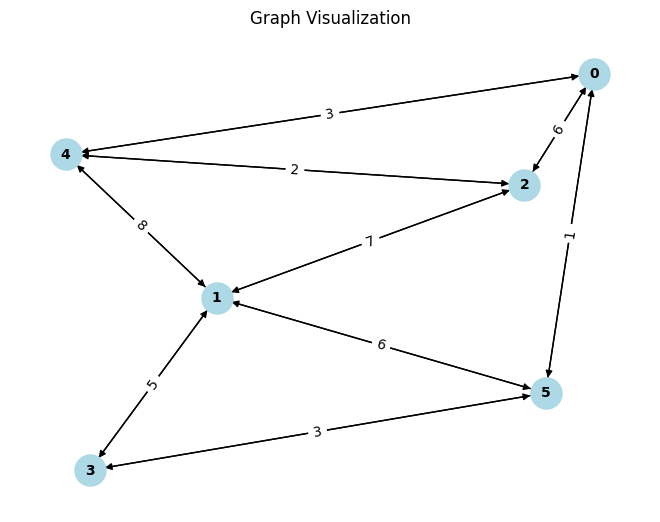

Graph edges (u, v, w):
   0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17
u   0   2   0   4   0   5   1   2   1   3   1   4   1   5   2   4   3   5
v   2   0   4   0   5   0   2   1   3   1   4   1   5   1   4   2   5   3
w   6   6   3   3   1   1   7   7   5   5   8   8   6   6   2   2   3   3
Bellman-Ford Bellman-Ford Bellman-Ford Bellman-Ford Bellman-Ford Bellman-Ford TimeBF Dijkstra Dijkstra Dijkstra Dijkstra Dijkstra Dijkstra   TimeDJ
           0            7            5            4            3            1      0        0        7        5        4        3        1 0.000032
           7            0            7            5            8            6      0        7        0        7        5        8        6 0.000011
           5            7            0            9            2            6      0        5        7        0        9        2        6 0.000012
           4            5            9            0            7            3      0     

In [ ]:
import time
import random
import heapq
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

class Graph:
    def __init__(self, V):
        """
        Initialize the graph.
        :param V: Number of vertices in the graph.
        """
        self.V = V  # Number of vertices
        self.graph = {i: [] for i in range(V)}  # Adjacency list representation
        self.edges = []  # List of edges

    def add_edge(self, u, v, w):
        """
        Add an edge to the graph.
        :param u: Starting vertex of the edge.
        :param v: Ending vertex of the edge.
        :param w: Weight of the edge.
        """
        self.graph[u].append((v, w))  # Add edge to adjacency list
        self.edges.append((u, v, w))  # Add edge to edge list

    def generate_complex_graph(self):
        """
        Generate a complex graph with a more interconnected structure.
        Ensures weights are between 1 and 9.
        """
        for u in range(self.V):
            for v in range(u + 1, self.V):
                if random.random() > 0.5:  # Randomly decide to add an edge or not
                    weight = random.randint(1, 9)
                    self.add_edge(u, v, weight)
                    self.add_edge(v, u, weight)

    def draw_graph(self):
        """
        Draw the graph using matplotlib and networkx.
        """
        G = nx.DiGraph()
        for u, v, w in self.edges:
            G.add_edge(u, v, weight=w)

        pos = nx.spring_layout(G)
        edge_labels = {(u, v): w for u, v, w in self.edges}

        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

        plt.title("Graph Visualization")
        plt.savefig('graph.svg')
        plt.show()

class ShortestPathAlgorithms:
    def __init__(self, graph):
        """
        Initialize the shortest path algorithms with the given graph.
        :param graph: Instance of the Graph class.
        """
        self.graph = graph

    def bellman_ford(self, src):
        """
        Bellman-Ford algorithm to find the shortest path from src to all other vertices.
        :param src: Source vertex.
        :return: List of shortest distances from src to each vertex.
        """
        V = self.graph.V
        E = self.graph.edges
        dist = [float("Inf")] * V  # Initialize distances to infinity
        dist[src] = 0  # Distance to source is 0

        for _ in range(V - 1):
            for u, v, w in E:
                if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w  # Relax the edge

        for u, v, w in E:
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                print("Graph contains a negative weight cycle")
                return None  # Negative weight cycle detected

        return dist

    def dijkstra(self, src):
        """
        Dijkstra's algorithm to find the shortest path from src to all other vertices.
        :param src: Source vertex.
        :return: List of shortest distances from src to each vertex.
        """
        V = self.graph.V
        dist = [float("Inf")] * V  # Initialize distances to infinity
        dist[src] = 0  # Distance to source is 0
        pq = [(0, src)]  # Priority queue for Dijkstra's algorithm

        while pq:
            d, u = heapq.heappop(pq)  # Get vertex with smallest distance
            if d > dist[u]:
                continue

            for v, weight in self.graph.graph[u]:
                if dist[u] + weight < dist[v]:
                    dist[v] = dist[u] + weight  # Relax the edge
                    heapq.heappush(pq, (dist[v], v))  # Push updated distance to priority queue

        return dist

def measure_execution_time(V):
    """
    Measure the execution time of Bellman-Ford and Dijkstra's algorithms.
    :param V: Number of vertices in the graph.
    :return: Execution times and distances for both algorithms.
    """
    graph = Graph(V)
    graph.generate_complex_graph()  # Generate a more interconnected graph
    graph.draw_graph()  # Draw the generated graph
    algorithms = ShortestPathAlgorithms(graph)  # Initialize algorithms with the graph

    # Measure times and distances for Bellman-Ford
    bellman_ford_distances = []
    bellman_ford_times = []
    for src in range(V):
        start_time = time.time()
        distances = algorithms.bellman_ford(src)  # Compute distances using Bellman-Ford
        end_time = time.time() - start_time  # Calculate execution time
        bellman_ford_distances.append(distances)
        bellman_ford_times.append(end_time)

    # Measure times and distances for Dijkstra
    dijkstra_distances = []
    dijkstra_times = []
    for src in range(V):
        start_time = time.time()
        distances = algorithms.dijkstra(src)  # Compute distances using Dijkstra
        end_time = time.time() - start_time  # Calculate execution time
        dijkstra_distances.append(distances)
        dijkstra_times.append(end_time)

    return graph.edges, bellman_ford_distances, bellman_ford_times, dijkstra_distances, dijkstra_times

if __name__ == "__main__":
    V = int(input("Enter the number of vertices in the graph: "))  # Input number of vertices

    edges, bellman_ford_distances, bellman_ford_times, dijkstra_distances, dijkstra_times = measure_execution_time(V)

    # Print graph structure
    print("Graph edges (u, v, w):")
    edges_df = pd.DataFrame(edges, columns=['u', 'v', 'w'])
    print(edges_df.T)

    # Handle infinite distances by replacing them with a large finite value
    inf_replacement = 999999

    # Convert distances to integers, replace inf with inf_replacement
    bellman_ford_distances = [[int(d) if d != float("Inf") else inf_replacement for d in dist] for dist in bellman_ford_distances]
    dijkstra_distances = [[int(d) if d != float("Inf") else inf_replacement for d in dist] for dist in dijkstra_distances]

    # Create and print combined result table
    result_table = pd.DataFrame(columns=["Bellman-Ford"] * V + ["TimeBF"] + ["Dijkstra"] * V + ["TimeDJ"])
    for i in range(V):
        result_table.loc[i] = bellman_ford_distances[i] + [bellman_ford_times[i]] + dijkstra_distances[i] + [dijkstra_times[i]]

    # Convert the integer columns to integer type
    for col in result_table.columns[:-2]:
        result_table[col] = result_table[col].astype(int)

    print(result_table.to_string(index=False, header=["Bellman-Ford"] * V + ["TimeBF"] + ["Dijkstra"] * V + ["TimeDJ"]))


In [ ]:
edges_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
u,0,2,0,4,0,5,1,2,1,3,1,4,1,5,2,4,3,5
v,2,0,4,0,5,0,2,1,3,1,4,1,5,1,4,2,5,3
w,6,6,3,3,1,1,7,7,5,5,8,8,6,6,2,2,3,3


In [ ]:
result_table

,Bellman-Ford,Bellman-Ford,Bellman-Ford,Bellman-Ford,Bellman-Ford,Bellman-Ford,TimeBF,Dijkstra,Dijkstra,Dijkstra,Dijkstra,Dijkstra,Dijkstra,TimeDJ
0,0,7,5,4,3,1,0,0,7,5,4,3,1,0.000032
1,7,0,7,5,8,6,0,7,0,7,5,8,6,0.000011
2,5,7,0,9,2,6,0,5,7,0,9,2,6,0.000012
3,4,5,9,0,7,3,0,4,5,9,0,7,3,0.000011
4,3,8,2,7,0,4,0,3,8,2,7,0,4,0.000010
5,1,6,6,3,4,0,0,1,6,6,3,4,0,0.000011


In [ ]:
bellman_ford_times

[6.4849853515625e-05,
 0.004960536956787109,
 5.8650970458984375e-05,
 4.935264587402344e-05,
 4.7206878662109375e-05,
 4.839897155761719e-05]

# CCS592 ASSIGNMENT

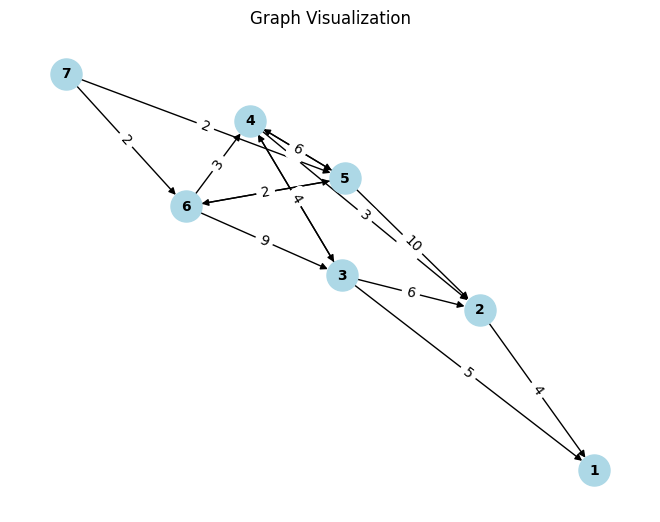

Graph edges (u, v, w):
   0   1   2   3   4   5   6   7   8   9   10  11  12  13  14
u   2   3   3   4   4   4   3   6   6   6   5   5   5   7   7
v   1   1   2   2   3   5   4   3   4   5   2   4   6   6   5
w   4   5   6   3   3   4   4   9   3   3  10   6   2   2   2
Bellman-Ford Bellman-Ford Bellman-Ford Bellman-Ford Bellman-Ford Bellman-Ford Bellman-Ford Bellman-Ford TimeBF Dijkstra Dijkstra Dijkstra Dijkstra Dijkstra Dijkstra Dijkstra Dijkstra   TimeDJ
           0       999999       999999       999999       999999       999999       999999       999999      0        0   999999   999999   999999   999999   999999   999999   999999 0.000008
      999999            0       999999       999999       999999       999999       999999       999999      0   999999        0   999999   999999   999999   999999   999999   999999 0.000004
      999999            4            0       999999       999999       999999       999999       999999      0   999999        4        0   999999   9999

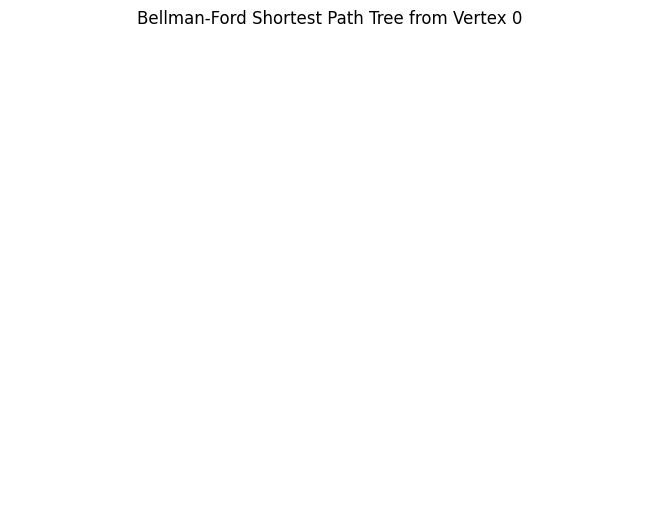

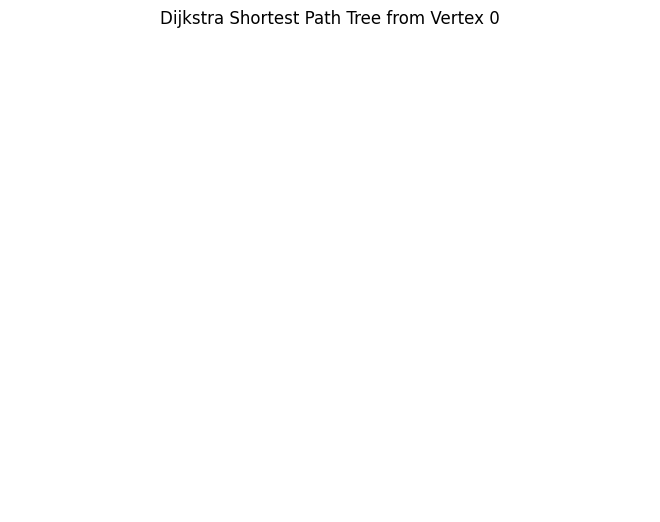

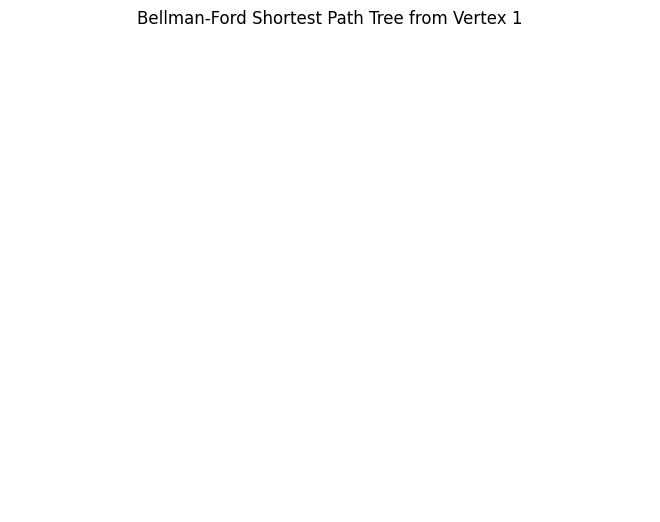

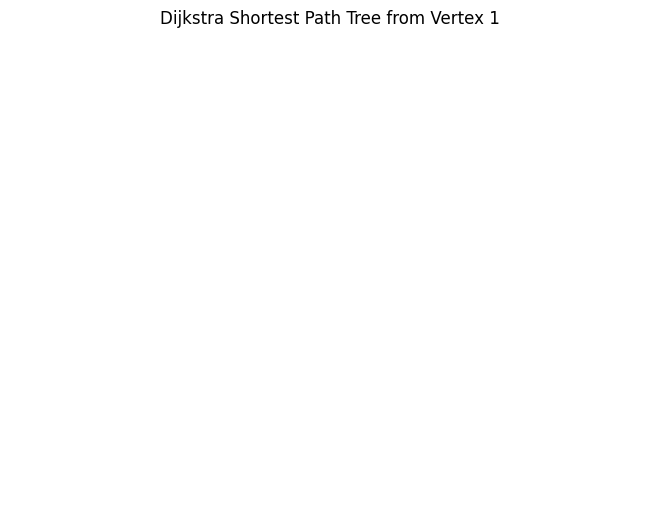

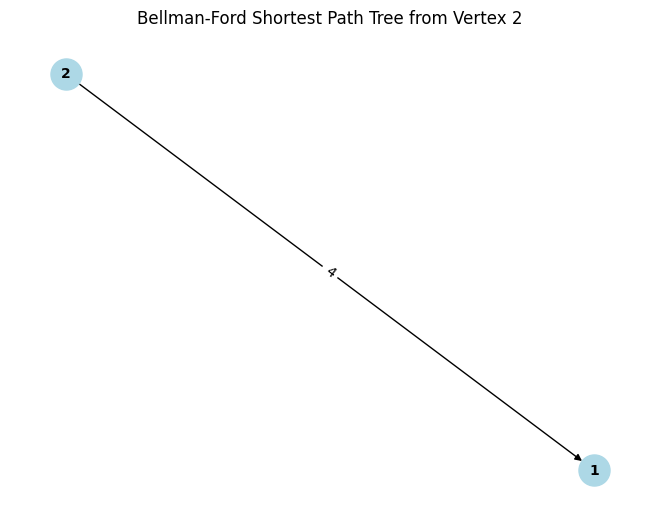

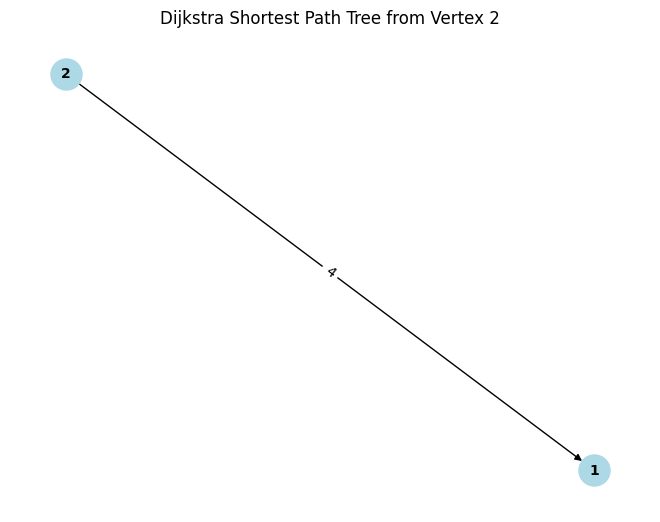

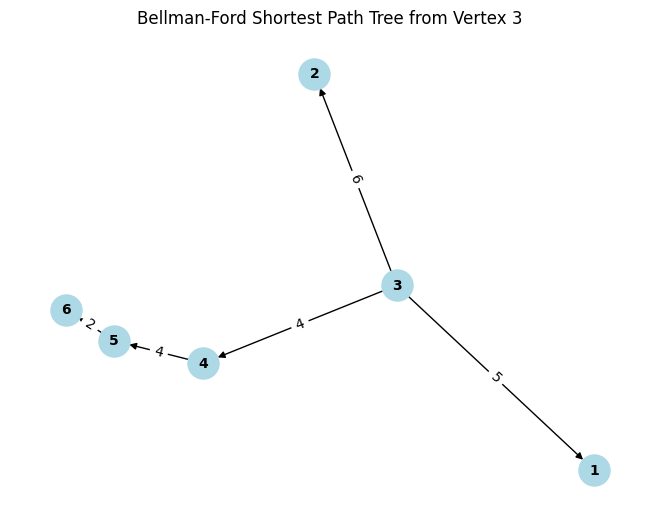

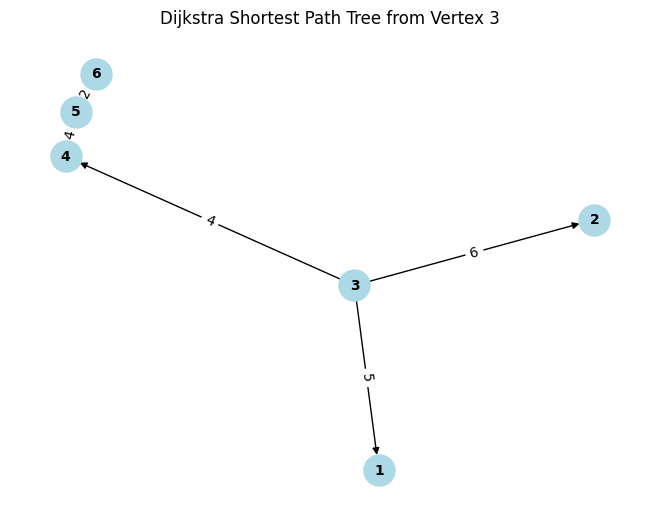

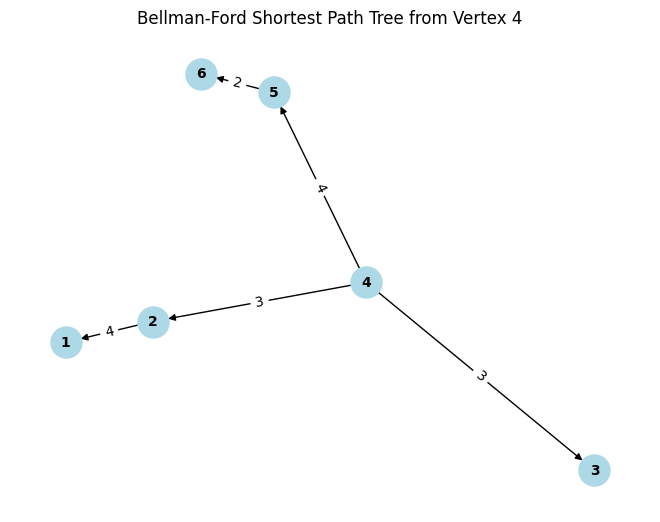

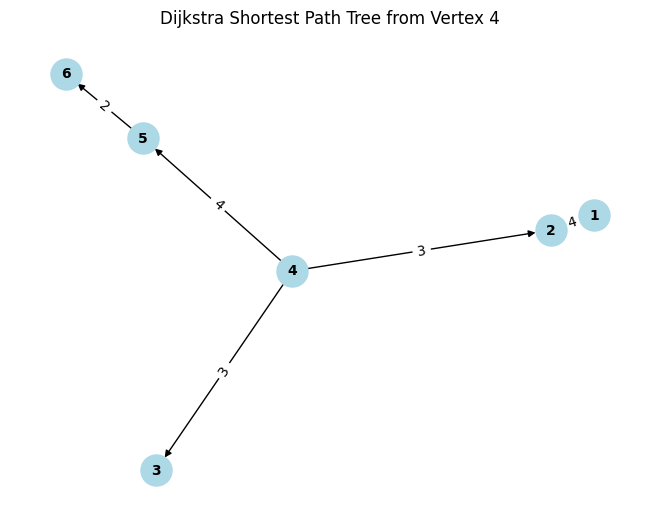

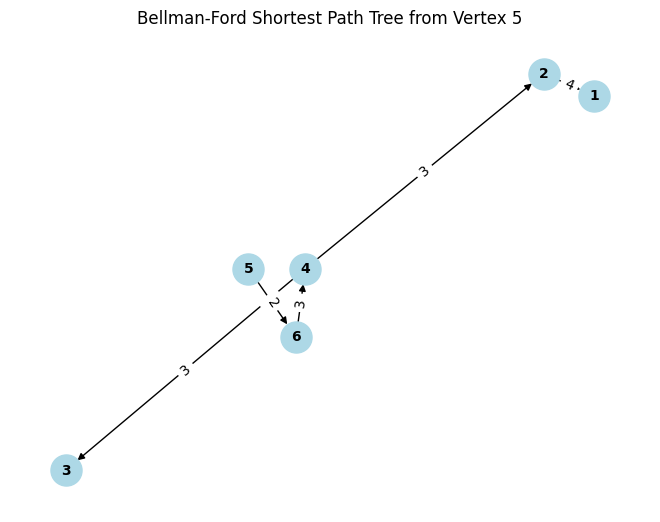

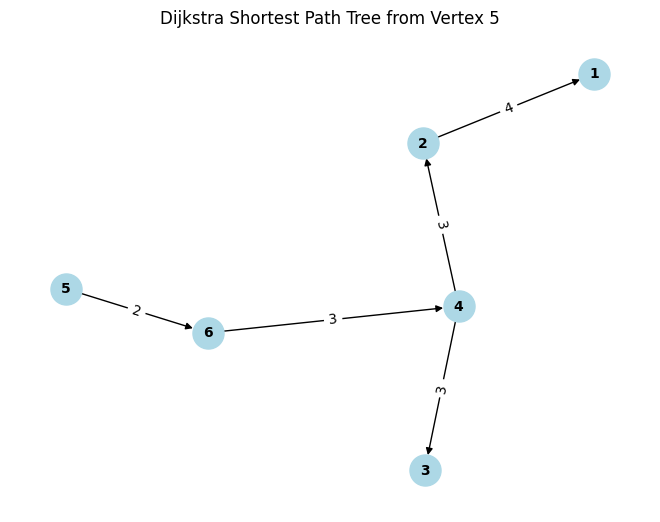

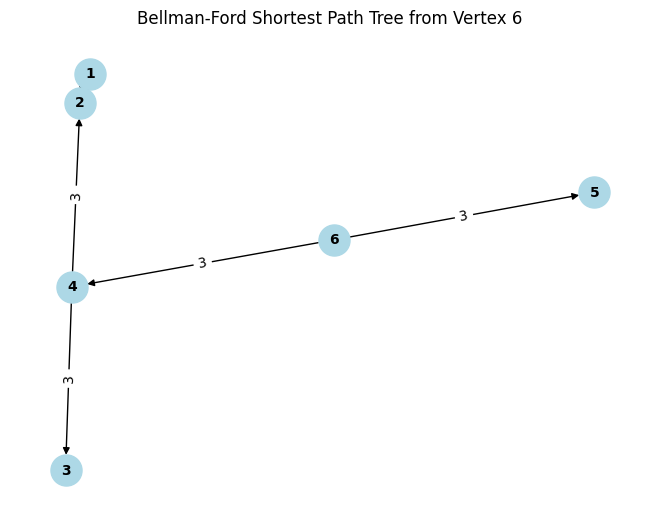

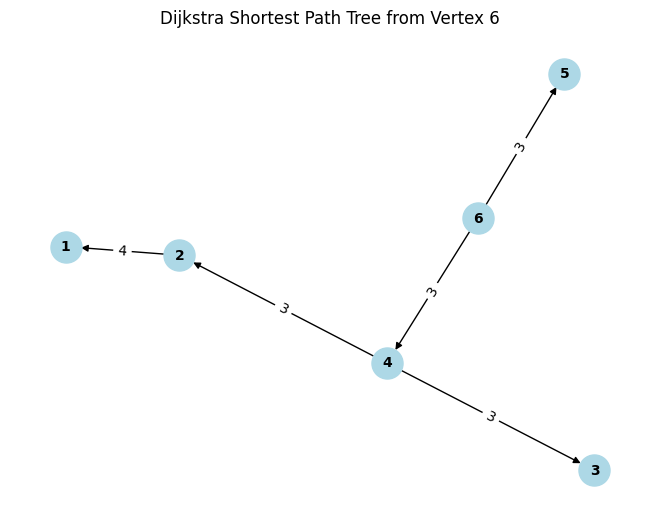

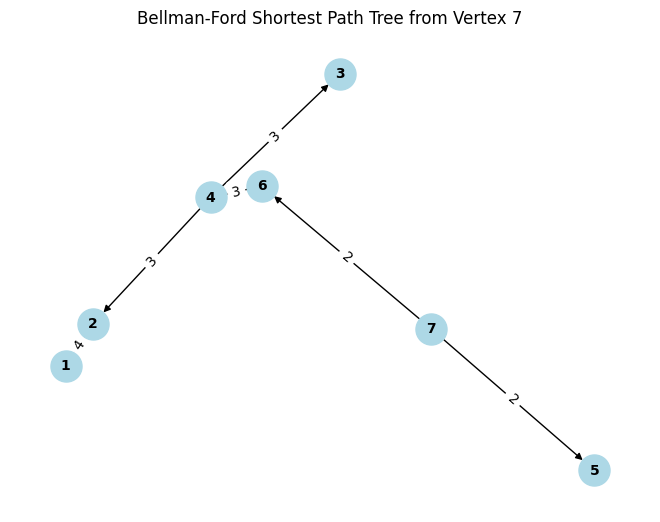

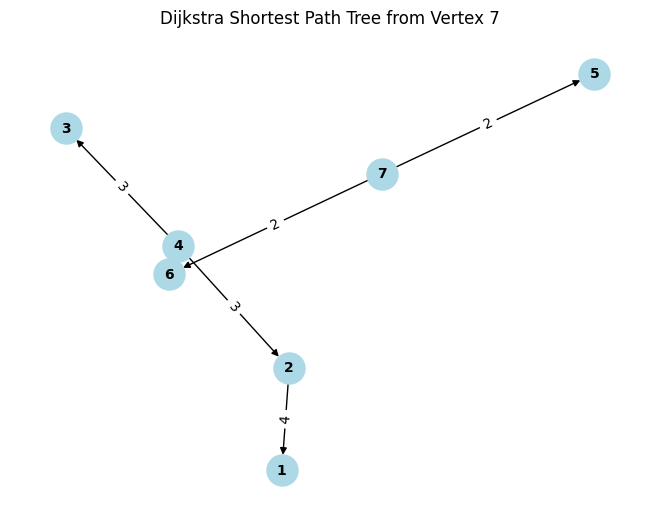

In [ ]:
import time
import heapq
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

class Graph:
    def __init__(self, V):
        """
        Initialize the graph.
        :param V: Number of vertices in the graph.
        """
        self.V = V  # Number of vertices
        self.graph = {i: [] for i in range(V)}  # Adjacency list representation
        self.edges = []  # List of edges

    def add_edge(self, u, v, w):
        """
        Add an edge to the graph.
        :param u: Starting vertex of the edge.
        :param v: Ending vertex of the edge.
        :param w: Weight of the edge.
        """
        self.graph[u].append((v, w))  # Add edge to adjacency list
        self.edges.append((u, v, w))  # Add edge to edge list

    def generate_fixed_graph(self):
        """
        Generate a fixed graph based on the provided structure.
        """

        fixed_edges = [
                (2, 1, 4), (3, 1, 5),
            (3, 2, 6),
            (4, 2, 3), (4, 3, 3), (4, 5, 4),
            (3, 4, 4), (6, 3, 9),
            (6, 4, 3), (6, 5, 3),
            (5, 2, 10), (5, 4, 6), (5, 6 ,2) ,
            (7, 6, 2), (7, 5 ,2)
        ]
        for u, v, w in fixed_edges:
            self.add_edge(u, v, w)

    def draw_graph(self):
        """
        Draw the graph using matplotlib and networkx.
        """
        G = nx.DiGraph()
        for u, v, w in self.edges:
            G.add_edge(u, v, weight=w)

        pos = nx.spring_layout(G)
        edge_labels = {(u, v): w for u, v, w in self.edges}

        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

        plt.title("Graph Visualization")
        plt.savefig('graph.svg')
        plt.show()

class ShortestPathAlgorithms:
    def __init__(self, graph):
        """
        Initialize the shortest path algorithms with the given graph.
        :param graph: Instance of the Graph class.
        """
        self.graph = graph

    def bellman_ford(self, src):
        """
        Bellman-Ford algorithm to find the shortest path from src to all other vertices.
        :param src: Source vertex.
        :return: List of shortest distances from src to each vertex.
        """
        V = self.graph.V
        E = self.graph.edges
        dist = [float("Inf")] * V  # Initialize distances to infinity
        dist[src] = 0  # Distance to source is 0
        predecessor = [None] * V  # Track predecessors to reconstruct path

        for _ in range(V - 1):
            for u, v, w in E:
                if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w  # Relax the edge
                    predecessor[v] = u  # Update predecessor

        for u, v, w in E:
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                print("Graph contains a negative weight cycle")
                return None, None  # Negative weight cycle detected

        return dist, predecessor

    def dijkstra(self, src):
        """
        Dijkstra's algorithm to find the shortest path from src to all other vertices.
        :param src: Source vertex.
        :return: List of shortest distances from src to each vertex.
        """
        V = self.graph.V
        dist = [float("Inf")] * V  # Initialize distances to infinity
        dist[src] = 0  # Distance to source is 0
        predecessor = [None] * V  # Track predecessors to reconstruct path
        pq = [(0, src)]  # Priority queue for Dijkstra's algorithm

        while pq:
            d, u = heapq.heappop(pq)  # Get vertex with smallest distance
            if d > dist[u]:
                continue

            for v, weight in self.graph.graph[u]:
                if dist[u] + weight < dist[v]:
                    dist[v] = dist[u] + weight  # Relax the edge
                    predecessor[v] = u  # Update predecessor
                    heapq.heappush(pq, (dist[v], v))  # Push updated distance to priority queue

        return dist, predecessor

    def draw_shortest_path_tree(self, src, dist, predecessor, title):
        """
        Draw the shortest path tree using matplotlib and networkx.
        :param src: Source vertex.
        :param dist: List of shortest distances from src to each vertex.
        :param predecessor: List of predecessors for each vertex.
        :param title: Title for the plot.
        """
        G = nx.DiGraph()

        for v in range(self.graph.V):
            if predecessor[v] is not None:
                G.add_edge(predecessor[v], v, weight=dist[v] - dist[predecessor[v]])

        pos = nx.spring_layout(G)
        edge_labels = {(u, v): G[u][v]['weight'] for u, v in G.edges}

        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

        plt.title(title)
        plt.show()

def measure_execution_time(V):
    """
    Measure the execution time of Bellman-Ford and Dijkstra's algorithms.
    :param V: Number of vertices in the graph.
    :return: Execution times and distances for both algorithms.
    """
    graph = Graph(V)
    graph.generate_fixed_graph()  # Generate the fixed graph
    graph.draw_graph()  # Draw the generated graph
    algorithms = ShortestPathAlgorithms(graph)  # Initialize algorithms with the graph

    # Measure times and distances for Bellman-Ford
    bellman_ford_distances = []
    bellman_ford_times = []
    bellman_ford_predecessors = []
    for src in range(V):
        start_time = time.time()
        distances, predecessor = algorithms.bellman_ford(src)  # Compute distances using Bellman-Ford
        end_time = time.time() - start_time  # Calculate execution time
        bellman_ford_distances.append(distances)
        bellman_ford_times.append(end_time)
        bellman_ford_predecessors.append(predecessor)

    # Measure times and distances for Dijkstra
    dijkstra_distances = []
    dijkstra_times = []
    dijkstra_predecessors = []
    for src in range(V):
        start_time = time.time()
        distances, predecessor = algorithms.dijkstra(src)  # Compute distances using Dijkstra
        end_time = time.time() - start_time  # Calculate execution time
        dijkstra_distances.append(distances)
        dijkstra_times.append(end_time)
        dijkstra_predecessors.append(predecessor)

    return graph.edges, bellman_ford_distances, bellman_ford_times, dijkstra_distances, dijkstra_times, bellman_ford_predecessors, dijkstra_predecessors

if __name__ == "__main__":
    V = 8  # Number of vertices for the fixed graph

    edges, bellman_ford_distances, bellman_ford_times, dijkstra_distances, dijkstra_times, bellman_ford_predecessors, dijkstra_predecessors = measure_execution_time(V)

    # Print graph structure
    print("Graph edges (u, v, w):")
    edges_df = pd.DataFrame(edges, columns=['u', 'v', 'w'])
    print(edges_df.T)

    # Handle infinite distances by replacing them with a large finite value
    inf_replacement = 999999

    # Convert distances to integers, replace inf with inf_replacement
    bellman_ford_distances = [[int(d) if d != float("Inf") else inf_replacement for d in dist] for dist in bellman_ford_distances]
    dijkstra_distances = [[int(d) if d != float("Inf") else inf_replacement for d in dist] for dist in dijkstra_distances]

    # Create and print combined result table
    result_table = pd.DataFrame(columns=["Bellman-Ford"] * V + ["TimeBF"] + ["Dijkstra"] * V + ["TimeDJ"])
    for i in range(V):
        result_table.loc[i] = bellman_ford_distances[i] + [bellman_ford_times[i]] + dijkstra_distances[i] + [dijkstra_times[i]]

    # Convert the integer columns to integer type
    for col in result_table.columns[:-2]:
        result_table[col] = result_table[col].astype(int)

    print(result_table.to_string(index=False, header=["Bellman-Ford"] * V + ["TimeBF"] + ["Dijkstra"] * V + ["TimeDJ"]))

    algorithms = ShortestPathAlgorithms(Graph(V))
    algorithms.graph.generate_fixed_graph()

    # Draw shortest path trees from each vertex to vertex 1
    for src in range(V):
        dist, predecessor = algorithms.bellman_ford(src)
        algorithms.draw_shortest_path_tree(src, dist, predecessor, f"Bellman-Ford Shortest Path Tree from Vertex {src}")

        dist, predecessor = algorithms.dijkstra(src)
        algorithms.draw_shortest_path_tree(src, dist, predecessor, f"Dijkstra Shortest Path Tree from Vertex {src}")
